# Lec06 : Softmax Regression

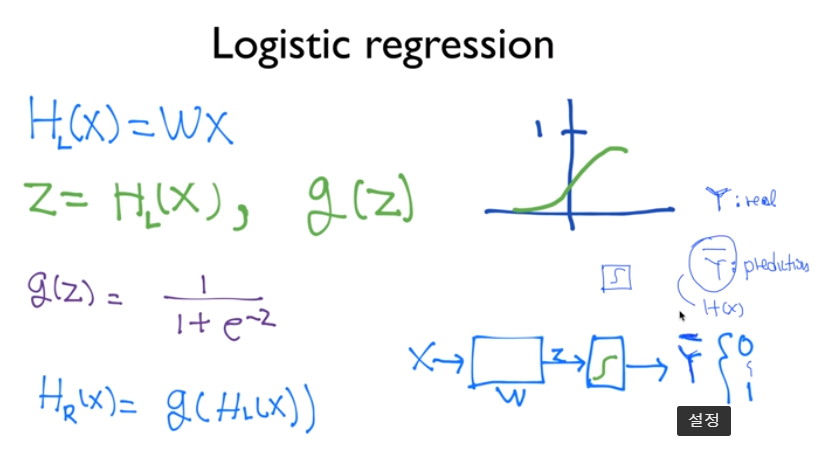

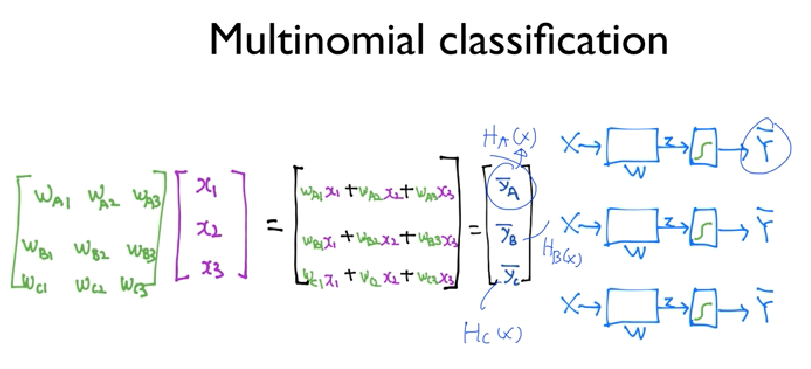

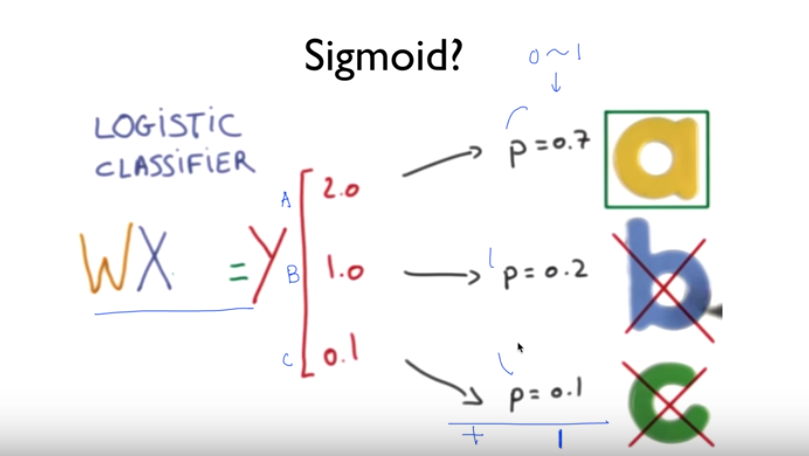

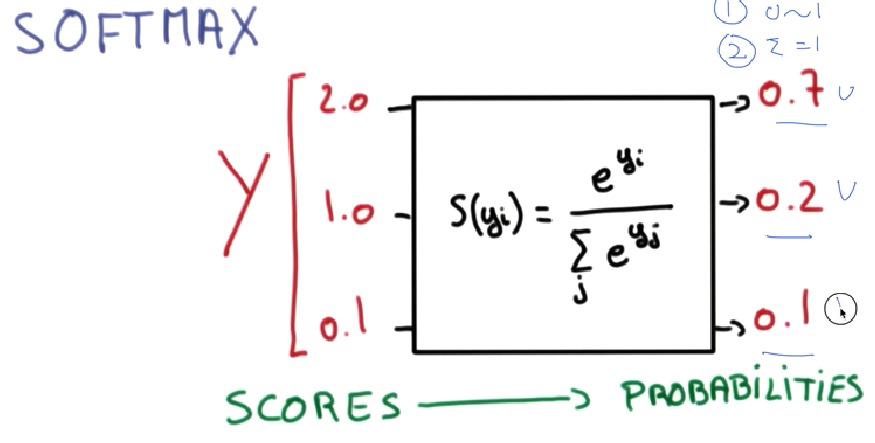

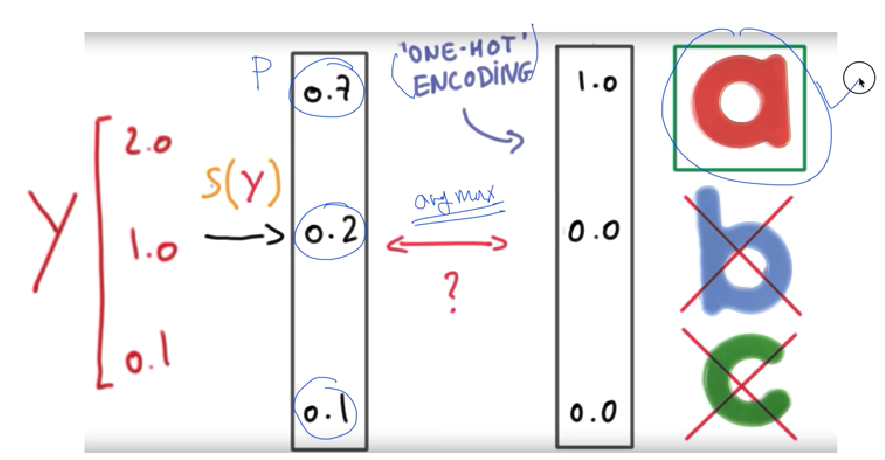

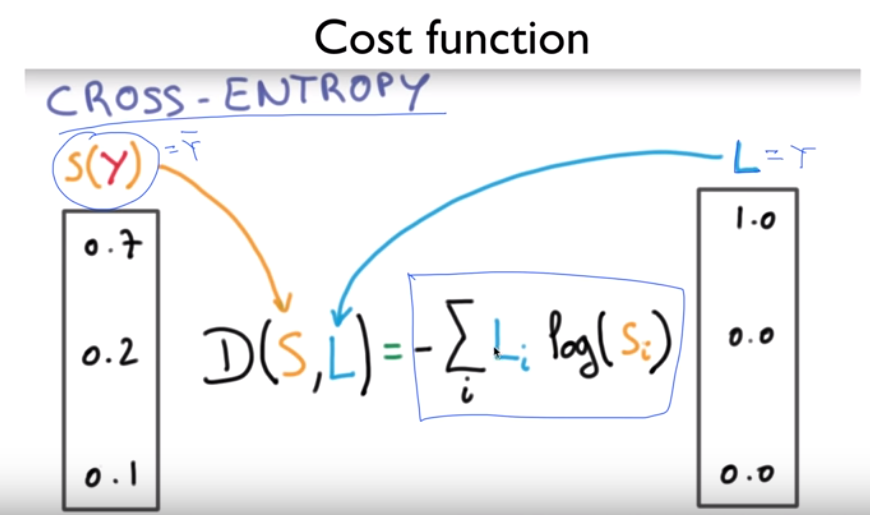

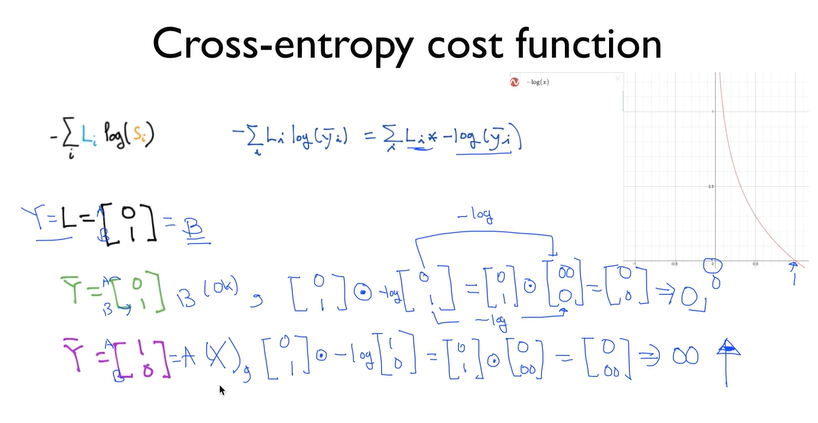

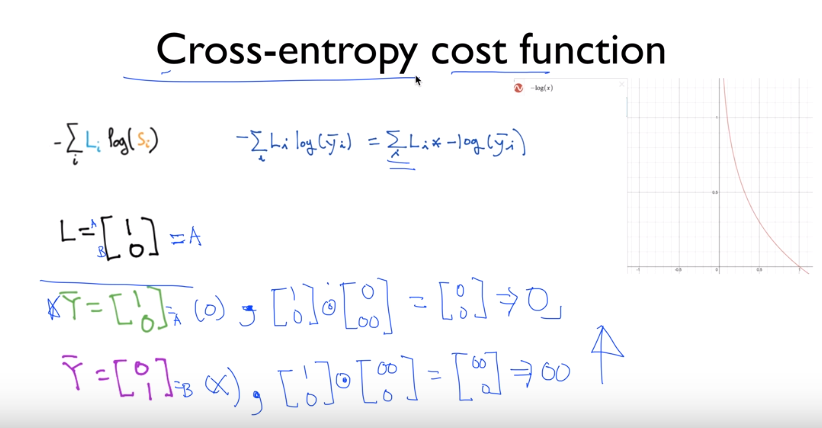

## Lab06

In [1]:
import tensorflow as tf
x_data = [[1, 2, 1, 1], [2, 1, 3, 2], [3, 1, 3, 4], [4, 1, 5, 5], [1, 7, 5, 5], [1, 2, 5, 6], [1, 6, 6, 6], [1, 7, 7, 7]]
y_data = [[0, 0, 1], [0, 0, 1], [0, 0, 1], [0, 1, 0], [0, 1, 0], [0, 1, 0], [1, 0, 0], [1, 0, 0]]

X = tf.placeholder("float", [None, 4])
Y = tf.placeholder("float", [None, 3])
nb_classes = 3

W = tf.Variable(tf.random_normal([4, nb_classes]), name='weight')
b = tf.Variable(tf.random_normal([nb_classes]), name='bias')

hypothesis = tf.nn.softmax(tf.matmul(X, W)+b)

cost = tf.reduce_mean(-tf.reduce_sum(Y*tf.log(hypothesis), axis=1))
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.1).minimize(cost)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for step in range(2001):
        sess.run(optimizer, feed_dict = {X: x_data, Y: y_data})
        if step % 200 == 0:
            print(step, sess.run(cost, feed_dict={X:x_data, Y:y_data}))

0 2.8982801
200 0.626935
400 0.5070889
600 0.4262287
800 0.35470384
1000 0.28277797
1200 0.2343393
1400 0.21280485
1600 0.19473855
1800 0.17937762
2000 0.16616952


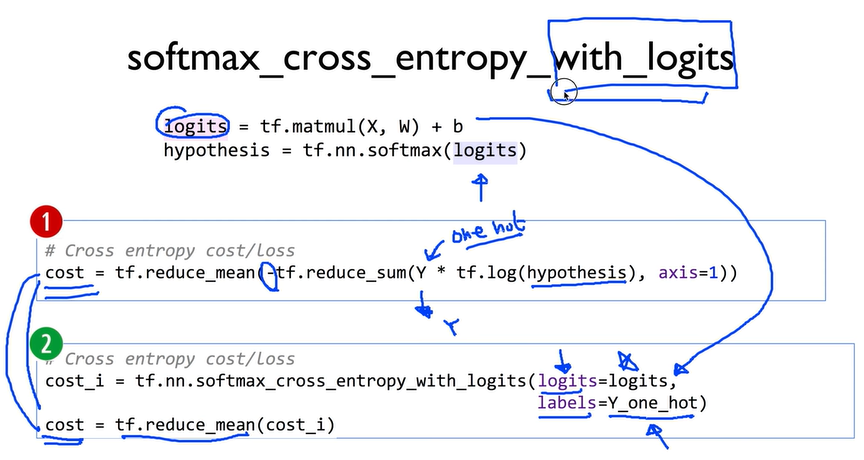

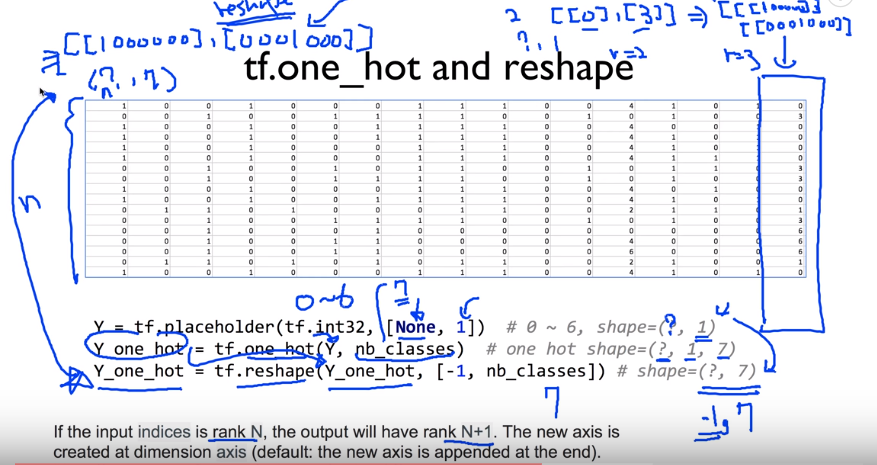

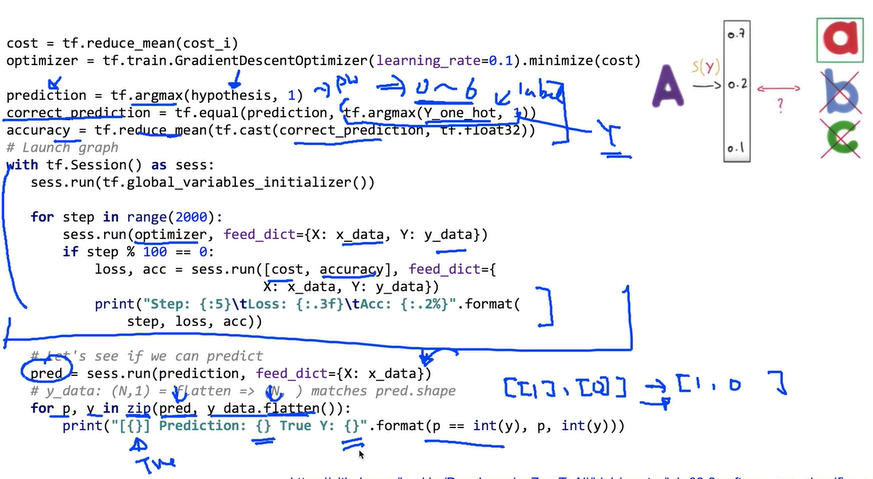

In [10]:
import tensorflow as tf
import numpy as np

xy = np.loadtxt('data-04-zoo.csv', delimiter=',', dtype = np.float32)
x_data = xy[:, 0:-1]
y_data = xy[:, [-1]]

nb_classes = 7

X = tf.placeholder(tf.float32, [None, 16])
Y = tf.placeholder(tf.int32, [None, 1])

Y_one_hot = tf.one_hot(Y, nb_classes)
Y_one_hot = tf.reshape(Y_one_hot, [-1, nb_classes])
W = tf.Variable(tf.random_normal([16, nb_classes]), name = 'weights')
b = tf.Variable(tf.random_normal([nb_classes]), name='bias')

#tf.nn.softmax computes softmax activations
#softmax = exp(logits) / reduce_sum(exp(Logits), dim)
logits = tf.matmul(X, W) + b
hypothesis = tf.nn.softmax(logits)

#Cross entropy cost/loss
cost_i = tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=Y_one_hot)

cost = tf.reduce_mean(cost_i)
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

prediction = tf.argmax(hypothesis, 1)
correct_prediction = tf.equal(prediction, tf.argmax(Y_one_hot, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for step in range(2000):
        sess.run(optimizer, feed_dict={X: x_data, Y: y_data})
        if step % 100 == 0:
            loss, acc = sess.run([cost, accuracy], feed_dict={X: x_data, Y: y_data})
            print("Step: {:5}\tLoss: {:.3f}\tAcc: {:.2%}".format(step, loss, acc))
    pred = sess.run(prediction, feed_dict={X: x_data})
    for p, y in zip(pred, y_data.flatten()):
        print("[{}] Prediction: {} True Y: {}".format(p == int(y), p, int(y)))

Step:     0	Loss: 5.274	Acc: 7.92%
Step:   100	Loss: 0.530	Acc: 89.11%
Step:   200	Loss: 0.324	Acc: 92.08%
Step:   300	Loss: 0.235	Acc: 96.04%
Step:   400	Loss: 0.187	Acc: 98.02%
Step:   500	Loss: 0.157	Acc: 98.02%
Step:   600	Loss: 0.135	Acc: 98.02%
Step:   700	Loss: 0.119	Acc: 98.02%
Step:   800	Loss: 0.107	Acc: 98.02%
Step:   900	Loss: 0.097	Acc: 99.01%
Step:  1000	Loss: 0.088	Acc: 99.01%
Step:  1100	Loss: 0.081	Acc: 99.01%
Step:  1200	Loss: 0.075	Acc: 100.00%
Step:  1300	Loss: 0.070	Acc: 100.00%
Step:  1400	Loss: 0.066	Acc: 100.00%
Step:  1500	Loss: 0.062	Acc: 100.00%
Step:  1600	Loss: 0.059	Acc: 100.00%
Step:  1700	Loss: 0.055	Acc: 100.00%
Step:  1800	Loss: 0.053	Acc: 100.00%
Step:  1900	Loss: 0.050	Acc: 100.00%
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 3 True Y: 3
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 3 True Y: 3
[True] Prediction: 3 True

# Lec07: learning rate(Data preprocessing), Overfitting, Regularization, Trainging/Testing Data set

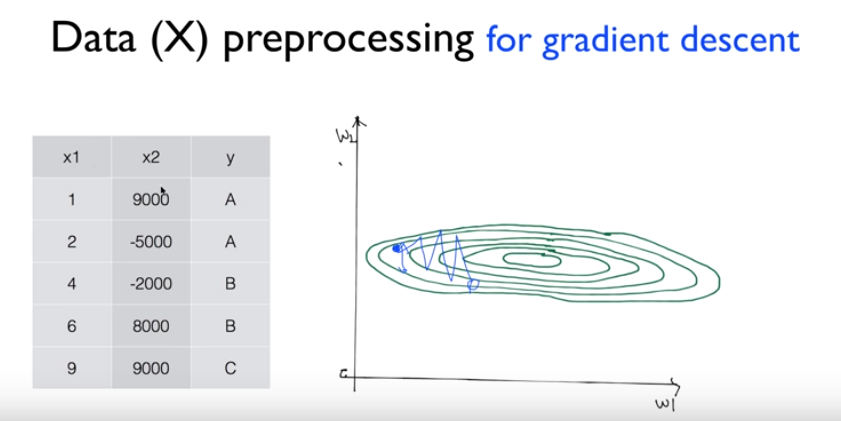

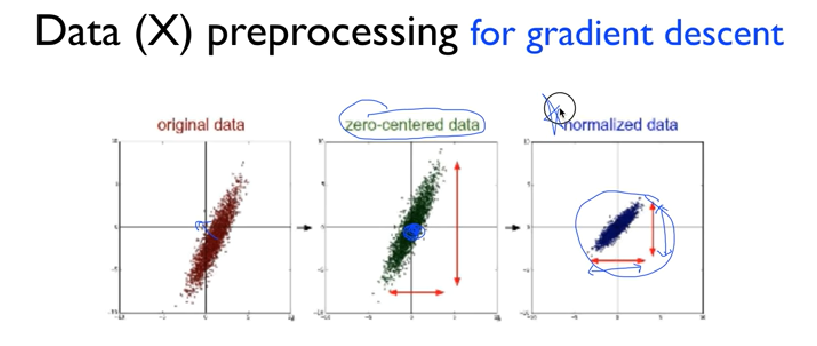

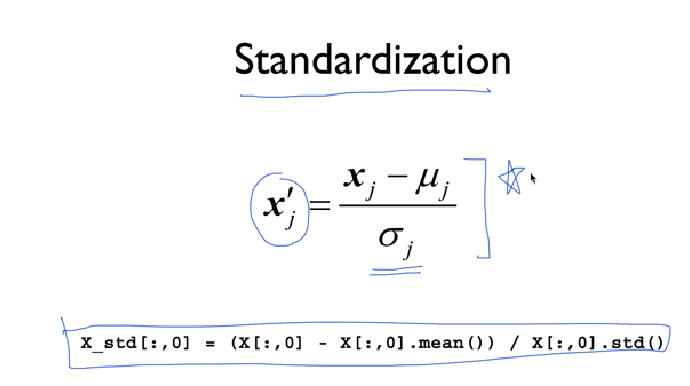

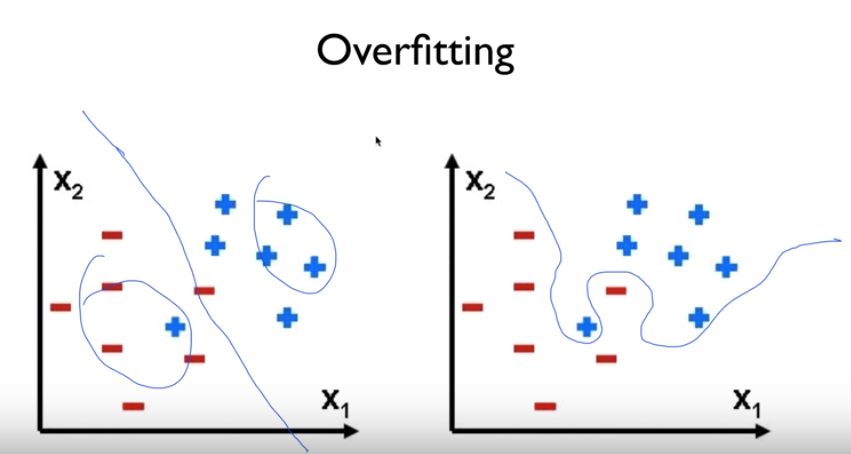

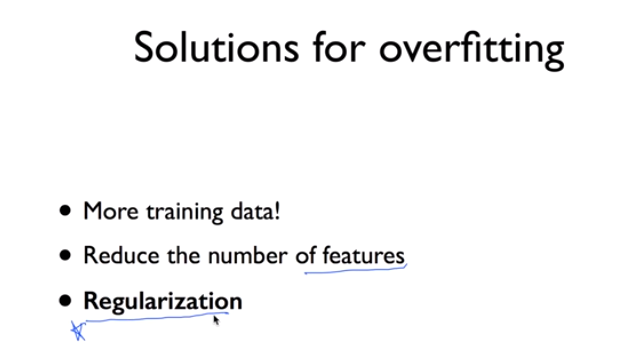

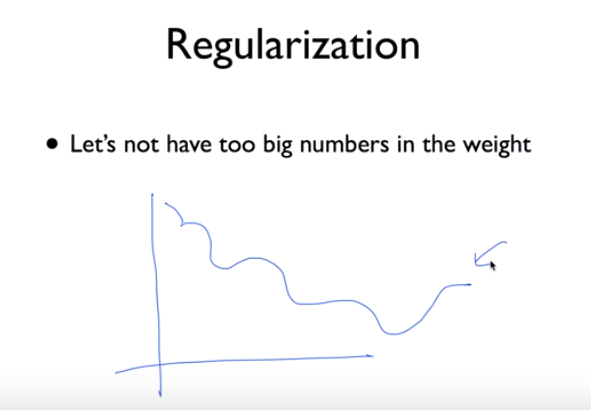

curve가 데이터에 맞게 굽어지는 것을 overfitting이라고 함  
overfitting 해소를 위해서는 flatten할 필요가 있음  
즉, weight이 더 작은 값을 가지도록 만드는 것!!  

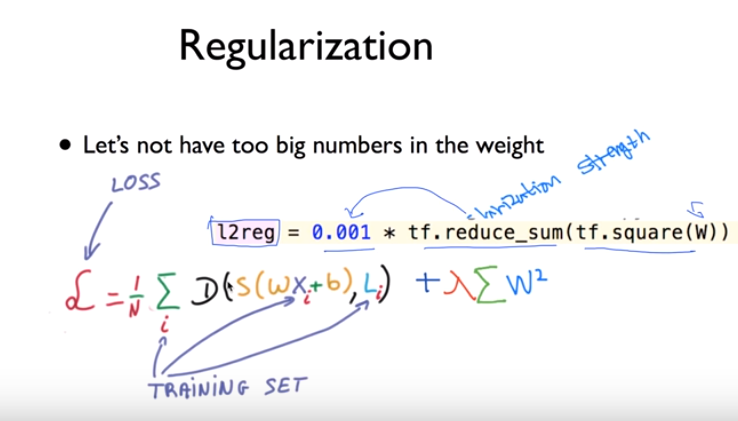

## Lab07

Performance evaluation: is this good?  
performance의 성능을 어떻게 평가할 것인가?

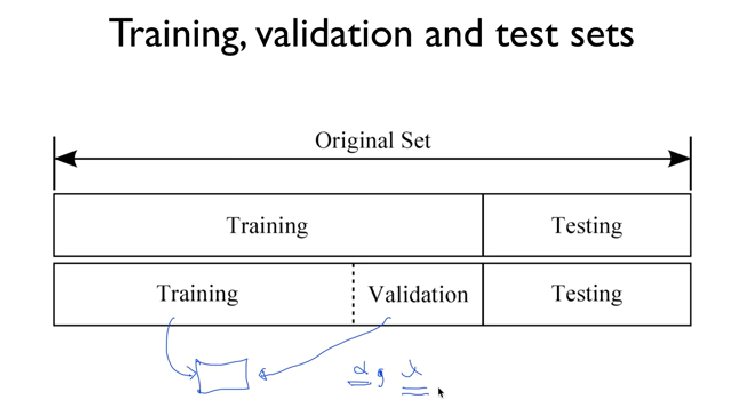

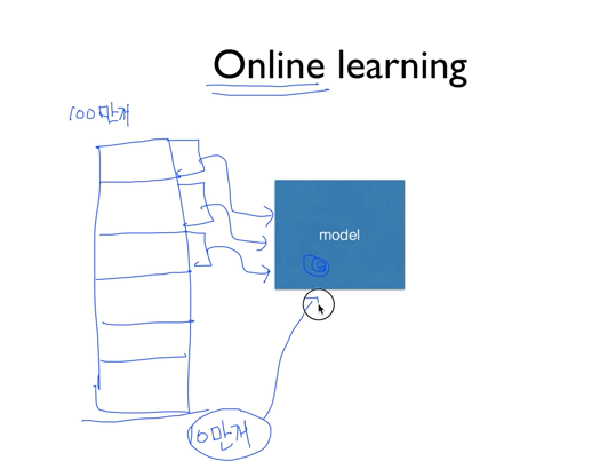

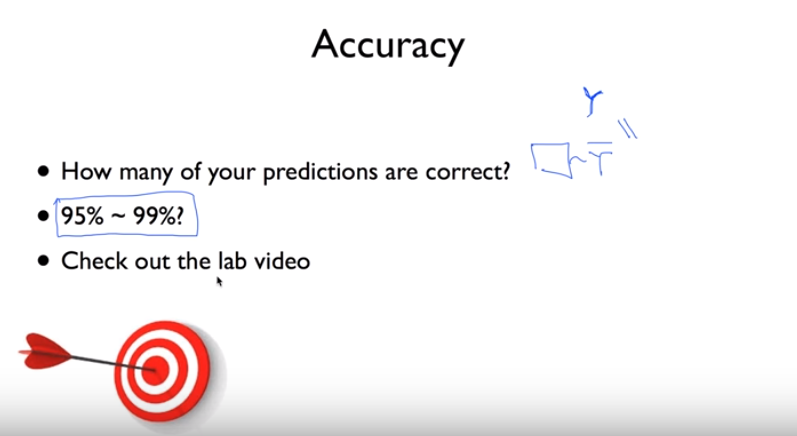

In [11]:
import tensorflow as tf

x_data = [[1, 2, 1], [1, 3, 2], [1, 3, 4], [1, 5, 5], [1, 7, 5], [1, 2, 5], [1, 6, 6], [1, 7, 7]]
y_data = [[0, 0, 1], [0, 0, 1], [0, 0, 1], [0, 1, 0], [0, 1, 0], [0, 1, 0], [1, 0, 0], [1, 0, 0]]

x_test = [[2, 1, 1], [3, 1, 2], [3, 3, 4]]
y_test = [[0, 0, 1], [0, 0, 1], [0, 0, 1]]

X = tf.placeholder("float", [None, 3])
Y = tf.placeholder("float", [None, 3])

W = tf.Variable(tf.random_normal([3, 3]))
b = tf.Variable(tf.random_normal([3]))

# tf.nn.softmax computes softmax activations
# softmax = exp(logits) / reduce_sum(exp(logits), dim)
hypothesis = tf.nn.softmax(tf.matmul(X, W) + b)

# Cross entropy cost/loss
cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), axis=1))

# Try to change learning_rate to small numbers
optimizer = tf.train.GradientDescentOptimizer(learning_rate=1e-10).minimize(cost)

# Correct prediction Test model
prediction = tf.arg_max(hypothesis, 1)
is_correct = tf.equal(prediction, tf.arg_max(Y, 1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

# Launch graph
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for step in range(201):
        cost_val, W_val, _ = sess.run([cost, W, optimizer], feed_dict={X: x_data, Y: y_data})
        print(step, cost_val, W_val)

    # predict
    print("Prediction:", sess.run(prediction, feed_dict={X: x_test}))
    # Calculate the accuracy
    print("Accuracy: ", sess.run(accuracy, feed_dict={X: x_test, Y: y_test}))

Instructions for updating:
Use `argmax` instead
0 2.0113266 [[ 2.6840863   1.6324875  -1.025684  ]
 [ 0.18774278 -1.5973088   0.78873885]
 [-0.02306021  2.1507545  -0.08635805]]
1 2.0113266 [[ 2.6840863   1.6324875  -1.025684  ]
 [ 0.18774278 -1.5973088   0.78873885]
 [-0.02306021  2.1507545  -0.08635805]]
2 2.0113266 [[ 2.6840863   1.6324875  -1.025684  ]
 [ 0.18774278 -1.5973088   0.78873885]
 [-0.02306021  2.1507545  -0.08635805]]
3 2.0113266 [[ 2.6840863   1.6324875  -1.025684  ]
 [ 0.18774278 -1.5973088   0.78873885]
 [-0.02306021  2.1507545  -0.08635805]]
4 2.0113266 [[ 2.6840863   1.6324875  -1.025684  ]
 [ 0.18774278 -1.5973088   0.78873885]
 [-0.02306021  2.1507545  -0.08635805]]
5 2.0113266 [[ 2.6840863   1.6324875  -1.025684  ]
 [ 0.18774278 -1.5973088   0.78873885]
 [-0.02306021  2.1507545  -0.08635805]]
6 2.0113266 [[ 2.6840863   1.6324875  -1.025684  ]
 [ 0.18774278 -1.5973088   0.78873885]
 [-0.02306021  2.1507545  -0.08635805]]
7 2.0113266 [[ 2.6840863   1.6324875  -1.0

98 2.0113266 [[ 2.6840863   1.6324875  -1.025684  ]
 [ 0.18774278 -1.5973088   0.78873885]
 [-0.02306021  2.1507545  -0.08635805]]
99 2.0113266 [[ 2.6840863   1.6324875  -1.025684  ]
 [ 0.18774278 -1.5973088   0.78873885]
 [-0.02306021  2.1507545  -0.08635805]]
100 2.0113266 [[ 2.6840863   1.6324875  -1.025684  ]
 [ 0.18774278 -1.5973088   0.78873885]
 [-0.02306021  2.1507545  -0.08635805]]
101 2.0113266 [[ 2.6840863   1.6324875  -1.025684  ]
 [ 0.18774278 -1.5973088   0.78873885]
 [-0.02306021  2.1507545  -0.08635805]]
102 2.0113266 [[ 2.6840863   1.6324875  -1.025684  ]
 [ 0.18774278 -1.5973088   0.78873885]
 [-0.02306021  2.1507545  -0.08635805]]
103 2.0113266 [[ 2.6840863   1.6324875  -1.025684  ]
 [ 0.18774278 -1.5973088   0.78873885]
 [-0.02306021  2.1507545  -0.08635805]]
104 2.0113266 [[ 2.6840863   1.6324875  -1.025684  ]
 [ 0.18774278 -1.5973088   0.78873885]
 [-0.02306021  2.1507545  -0.08635805]]
105 2.0113266 [[ 2.6840863   1.6324875  -1.025684  ]
 [ 0.18774278 -1.5973088 

176 2.0113266 [[ 2.6840863   1.6324875  -1.025684  ]
 [ 0.18774278 -1.5973088   0.78873885]
 [-0.02306021  2.1507545  -0.08635805]]
177 2.0113266 [[ 2.6840863   1.6324875  -1.025684  ]
 [ 0.18774278 -1.5973088   0.78873885]
 [-0.02306021  2.1507545  -0.08635805]]
178 2.0113266 [[ 2.6840863   1.6324875  -1.025684  ]
 [ 0.18774278 -1.5973088   0.78873885]
 [-0.02306021  2.1507545  -0.08635805]]
179 2.0113266 [[ 2.6840863   1.6324875  -1.025684  ]
 [ 0.18774278 -1.5973088   0.78873885]
 [-0.02306021  2.1507545  -0.08635805]]
180 2.0113266 [[ 2.6840863   1.6324875  -1.025684  ]
 [ 0.18774278 -1.5973088   0.78873885]
 [-0.02306021  2.1507545  -0.08635805]]
181 2.0113266 [[ 2.6840863   1.6324875  -1.025684  ]
 [ 0.18774278 -1.5973088   0.78873885]
 [-0.02306021  2.1507545  -0.08635805]]
182 2.0113266 [[ 2.6840863   1.6324875  -1.025684  ]
 [ 0.18774278 -1.5973088   0.78873885]
 [-0.02306021  2.1507545  -0.08635805]]
183 2.0113266 [[ 2.6840863   1.6324875  -1.025684  ]
 [ 0.18774278 -1.597308

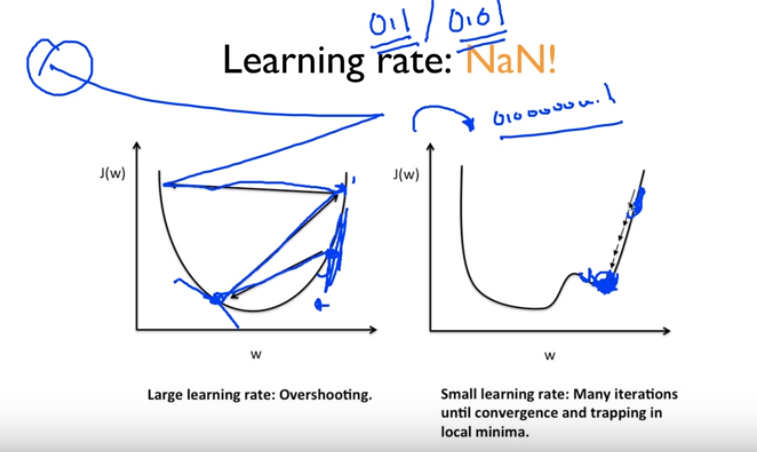

학습이 잘 되었는데도 결과값이 NaN이라면?  
데이터가 정규화될 필요가 있다!!

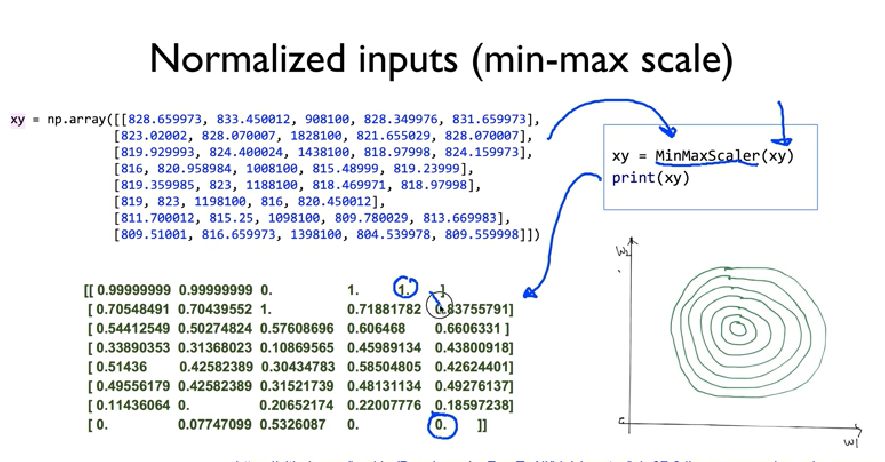

MNIST Data set

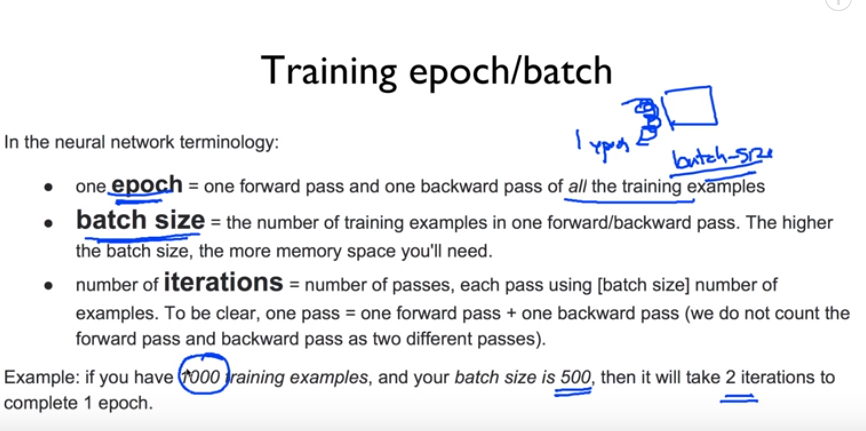

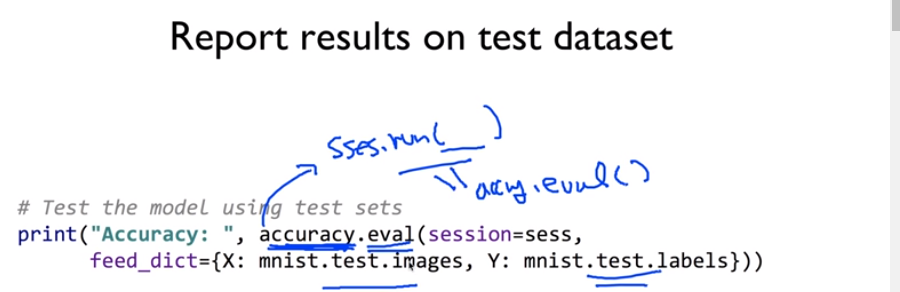

In [12]:
from tensorflow.examples.tutorials.mnist import input_data

In [14]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot = True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py fr

Epoch: 0001 cost= 2.674153054
Epoch: 0002 cost= 1.033370122
Epoch: 0003 cost= 0.836532561
Epoch: 0004 cost= 0.738724349
Epoch: 0005 cost= 0.676374718
Epoch: 0006 cost= 0.631684200
Epoch: 0007 cost= 0.597442940
Epoch: 0008 cost= 0.569727357
Epoch: 0009 cost= 0.546487345
Epoch: 0010 cost= 0.527000208
Epoch: 0011 cost= 0.510451790
Epoch: 0012 cost= 0.495664216
Epoch: 0013 cost= 0.482883948
Epoch: 0014 cost= 0.471626133
Epoch: 0015 cost= 0.461221849
Accuracy:  0.8894
Label:  [9]
Prediction:  [9]


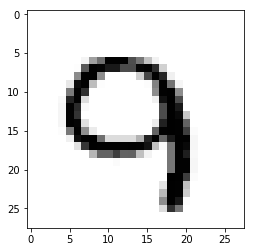

In [26]:
import random
import matplotlib.pyplot as plt

nb_classes = 10
X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, nb_classes])

W = tf.Variable(tf.random_normal([784, nb_classes]))
b = tf.Variable(tf.random_normal([nb_classes]))

hypothesis = tf.nn.softmax(tf.matmul(X, W)+b)
                
cost = tf.reduce_mean(-tf.reduce_sum(Y*tf.log(hypothesis), axis=1))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)
                

is_correct = tf.equal(tf.arg_max(hypothesis,1), tf.arg_max(Y, 1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

training_epochs = 15
batch_size = 100

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for epoch in range(training_epochs):
        avg_cost = 0
        total_batch = int(mnist.train.num_examples / batch_size)
        
        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            c, _ = sess.run([cost, optimizer], feed_dict = {X:batch_xs, Y:batch_ys})
            avg_cost += c / total_batch
        print('Epoch:', '%04d' % (epoch+1), 'cost=', '{:.9f}'.format(avg_cost))
    print("Accuracy: ", accuracy.eval(session=sess, feed_dict={X: mnist.test.images, Y: mnist.test.labels}))
        
    r = random.randint(0, mnist.test.num_examples - 1)
    print("Label: ", sess.run(tf.argmax(mnist.test.labels[r:r + 1], 1)))
    print("Prediction: ", sess.run(tf.argmax(hypothesis, 1), feed_dict={X: mnist.test.images[r:r + 1]}))

    plt.imshow(mnist.test.images[r:r + 1].reshape(28, 28), cmap='Greys', interpolation='nearest')
    plt.show()